In [7]:
import glob
import os
import json
import numpy as np
from utils.plotting import plot_grid_exp

In [20]:
strng

'weakly_sup256_norelut_nonorm_Signers_2345679_n50058_10_4_01_10_075_06_11_5_06_025.lsh'

In [26]:
with open('/home/korhan/Dropbox/tez/grid_files.txt','r') as f: lines = f.readlines()
exp_names = []
exp_basenames = []
for l in lines:
    strng = l.strip('\n').split('/')[-1][:-10]
    exp_names.append( 'zrroot_{}/exp/{}.lsh64'.format(strng, strng))
    exp_basenames.append(strng)
    
print(len(exp_names))
exp_names[0], exp_basenames[0], exp_names[-1]

36


('zrroot_weakly_sup256_norelut_nonorm_Signers_2345679_n50059_10_25_01_10_075_06_9_5_055_025/exp/weakly_sup256_norelut_nonorm_Signers_2345679_n50059_10_25_01_10_075_06_9_5_055_025.lsh64',
 'weakly_sup256_norelut_nonorm_Signers_2345679_n50059_10_25_01_10_075_06_9_5_055_025',
 'zrroot_weakly_sup256_norelut_nonorm_Signers_2345679_n50059_10_4_01_10_075_07_11_5_065_025/exp/weakly_sup256_norelut_nonorm_Signers_2345679_n50059_10_4_01_10_075_07_11_5_065_025.lsh64')

In [45]:
# post disc for all grid 
exp_root = '/home/korhan/Desktop/zerospeech2017/track2/src/ZRTools/exp/'


grid_name = 'Signer07_c3_right_PCA'
grid_name = 'Signer03_c3_right_PCA50'

#grid_name = 'corAE_op100_s4s5_64_iter0_pairs_tanh_lr1e3_Signer03'
grid_name = 'weakly_sup256_norelut_*Signer0357'
grid_name = 'weakly_sup256_norelut_nonorm_Signers_2345679_n50061'
grid_name = 'weakly_sup256_norelug_Signers_2345679_n50061'

signer_id = grid_name[:8]
signer_id = grid_name[-8:]
signer_id = ['Signer03']#, 'Signer09']
signer_id = ['Signer0'+ str(i) for i in [2,3,4,5,6,7,9]]
print(signer_id)

name_root = 'zrroot0_{}*/exp/*'.format(grid_name)
#name_root = '{}*/exp/*'.format(grid_name)
name_root = 'zrroot_{}*/exp/*'.format(grid_name)

exp_names = []
exp_basenames = []

srdir = sorted(glob.glob(exp_root + name_root))
for path in srdir:
    exp_names.append('/'.join(path.split('/')[-3:]))
    exp_basenames.append('/'.join(path.split('/')[-1:])[:-6])

    
print(len(exp_names))
exp_names[0], exp_basenames[0]



['Signer02', 'Signer03', 'Signer04', 'Signer05', 'Signer06', 'Signer07', 'Signer09']
48


('zrroot_weakly_sup256_norelug_Signers_2345679_n50061_10_3_01_10_075_065_13_5_06_025/exp/weakly_sup256_norelug_Signers_2345679_n50061_10_3_01_10_075_065_13_5_06_025.lsh64',
 'weakly_sup256_norelug_Signers_2345679_n50061_10_3_01_10_075_065_13_5_06_025')

In [47]:
filepath = '/home/korhan/Dropbox/tez/grid_files_'+grid_name+'.txt'
with open(filepath,'w') as f: f.writelines('\n'.join(exp_names))
    
print('cd /home/korhan/Dropbox/tez_scripts/')
print('./postdisc_tde_grid.sh {} 81 94 3'.format(filepath))

cd /home/korhan/Dropbox/tez_scripts/
./postdisc_tde_grid.sh /home/korhan/Dropbox/tez/grid_files_weakly_sup256_norelug_Signers_2345679_n50061.txt 81 94 3


In [48]:
final = dict()

In [49]:
results_root = '/home/korhan/Dropbox/tez/exp_results/'

for name in exp_basenames:
    dtw_sweep_rslts = sorted(glob.glob(os.path.join(results_root,name,'*.json')))
    tmp = []
    for pth in dtw_sweep_rslts:
        with open(pth,'r') as f: scores = json.load(f)
        scores['dtw'] = float('0.' + os.path.split(pth)[-1].split('.')[0].strip('dtw_'))
        if not np.isnan(list(scores.values())).any(): tmp.append(scores)
    final[name] = tmp

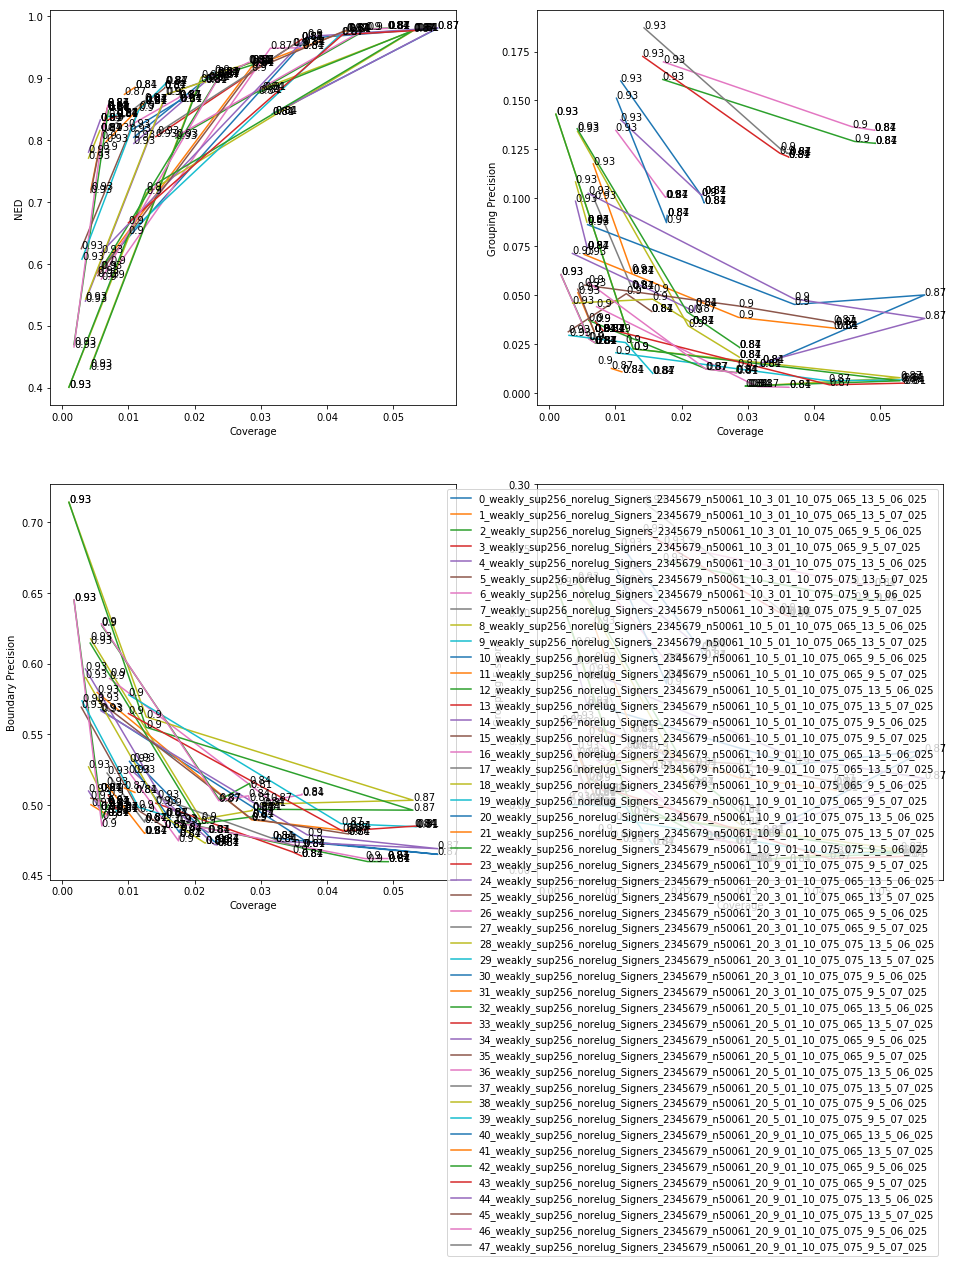

In [50]:
metrics = ['ned', 'grouping_P', 'boundary_P', 'grouping_F']

k = 0
d = 12
candidates = np.arange(k*d,(k+1)*d)
#candidates = [1,20,27,43] # 7
i =6
#candidates = [i,i+d,i+2*d,i+3*d]

#candidates = [2,50]
candidates = 'all'

plot_grid_exp((2,2), final, candidates, metrics, xaxis='coverage', annot_freq=1)